# Node Parsers

In [1]:
import os

In [2]:
from dotenv import load_dotenv, find_dotenv

In [3]:
# Load environment variables from the .env file
load_dotenv('D:/.env')

False

In [6]:
# Retrieve the OpenAI API key from environment variables
OPENAI_API_KEY = os.environ['OPENAI_API_KEY']

Download the required packages by executing the below commands in either Anaconda Prompt (in Windows) or Terminal (in Linux or Mac OS)

pip install tree-sitter_languages tree-sitter==0.21.3

https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules/

# Creating Nodes Manually

In [1]:
from llama_index.core import Document
from llama_index.core.schema import TextNode
doc = Document(text="This is a sample document text")

In [100]:
doc.doc_id

'8beeded7-4248-4df8-bd8c-87d64daec055'

In [101]:
doc

Document(id_='8beeded7-4248-4df8-bd8c-87d64daec055', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='This is a sample document text', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n')

In [102]:
doc.metadata

{}

In [105]:
doc.metadata = {"report_name": "Competition Analysis Report May 2024",\
                     "department": "Marketing",\
                     "author": "Prashant"}

In [106]:
doc

Document(id_='8beeded7-4248-4df8-bd8c-87d64daec055', embedding=None, metadata={'report_name': 'Competition Analysis Report May 2024', 'department': 'Marketing', 'author': 'Prashant'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='This is a sample document text', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n')

In [71]:
from llama_index.core import Document
from llama_index.core.schema import TextNode, NodeRelationship, RelatedNodeInfo

doc = Document(text="First sentence. Second Sentence")

n1 = TextNode(text="First sentence", node_id=doc.doc_id)
n2 = TextNode(text="Second sentence", node_id=doc.doc_id)

n1.relationships[NodeRelationship.NEXT] = n2.node_id
n2.relationships[NodeRelationship.PREVIOUS] = n1.node_id

print(n1.relationships)
print(n2.relationships)

{<NodeRelationship.NEXT: '3'>: '540d4db0-a0e9-405c-824b-be73efa70942'}
{<NodeRelationship.PREVIOUS: '2'>: 'b38c2189-b088-4153-9e86-2d1dd62c674d'}


In this example, we’ve manually created two Nodes and defined a previous or next relationship between them. The relationship tracks the order of Nodes within the original Document. This code tells LlamaIndex that the two Nodes belong to the initial Document and they also come in a particular order.

# File-Based Node Parsers

## HTML Parser

In [73]:
import requests

In [74]:
from llama_index.core import Document

In [75]:
from llama_index.core.node_parser import HTMLNodeParser

- This parser uses Beautiful Soup to parse HTML files and convert them into nodes based on selected HTML tags. 
- This parser simplifies the HTML file by extracting text from standard text elements and merging adjacent nodes of the same type.

In [76]:
# URL of the website to fetch HTML from
url = "https://docs.llamaindex.ai/en/stable/"

# Send a GET request to the URL
response = requests.get(url)
print(response)

<Response [200]>


In [77]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the HTML content from the response
    html_doc = response.text
    
    # Create a Document object with the HTML content
    document = Document(id_=url, text=html_doc)
    
    # Initialize the HTMLNodeParser with optional list of tags
    parser = HTMLNodeParser()
    
    # Parse nodes from the HTML document
    nodes = parser.get_nodes_from_documents([document])
    
else:
    # Print an error message if the request was unsuccessful
    print("Failed to fetch HTML content:", response.status_code)

In [78]:
len(nodes)

25

In [79]:
nodes[1].to_dict()

{'id_': '59fac3ea-f112-403a-8bd8-7a1138c6a714',
 'embedding': None,
 'metadata': {'tag': 'h1'},
 'excluded_embed_metadata_keys': [],
 'excluded_llm_metadata_keys': [],
 'relationships': {<NodeRelationship.SOURCE: '1'>: {'node_id': 'https://docs.llamaindex.ai/en/stable/',
   'node_type': <ObjectType.DOCUMENT: '4'>,
   'metadata': {},
   'hash': '83f4b9319f63c5b804653c8a0d61d38f843e16c2db95ae3609e8d281f3037f15',
   'class_name': 'RelatedNodeInfo'},
  <NodeRelationship.PREVIOUS: '2'>: {'node_id': '8cf3b283-a0e8-489f-85fd-c65fc3de7529',
   'node_type': <ObjectType.TEXT: '1'>,
   'metadata': {'tag': 'li'},
   'hash': '49194ece155aea20b623979aeb0534c68a6b8f2a7f2704f70886c0ae138043e0',
   'class_name': 'RelatedNodeInfo'},
  <NodeRelationship.NEXT: '3'>: {'node_id': '507bbc33-29ce-4e21-b5b7-cff64c0a5b64',
   'node_type': <ObjectType.TEXT: '1'>,
   'metadata': {'tag': 'p'},
   'hash': 'e0be35a3dd907cc78269ad24a561d80c7eb1cb986ff54e16bac83c6b89165c76',
   'class_name': 'RelatedNodeInfo'}},
 'tex

You have the option to customize the HTML tags from where you want to retrieve content.

In [86]:
my_tags = ["p", "span"]
html_parser = HTMLNodeParser(tags=my_tags)
nodes = html_parser.get_nodes_from_documents([document])

In [87]:
print('<span> elements:')
for node in nodes:
    if node.metadata['tag']=='span':
        print(node.text)

<span> elements:
LlamaIndex
LlamaIndex
Home


High-Level Concepts (RAG)
Installation and Setup
How to read these docs
Starter Examples


Starter Tutorial (OpenAI)
Starter Tutorial (Local Models)
Discover LlamaIndex Video Series
Frequently Asked Questions (FAQ)
Starter Tools


RAG CLI
Learn


Using LLMs
Loading & Ingestion


Loading Data (Ingestion)
LlamaHub
Indexing & Embedding
Storing
Querying
Tracing and Debugging
Evaluating


Evaluating
Cost Analysis


Usage Pattern
Putting it all Together


Agents
Full-Stack Web Application
Knowledge Graphs
Q&A patterns
Structured Data
apps


A Guide to Building a Full-Stack Web App with LLamaIndex
A Guide to Building a Full-Stack LlamaIndex Web App with Delphic
chatbots


How to Build a Chatbot
q_and_a


A Guide to Extracting Terms and Definitions
Use Cases


Prompting
Question-Answering (RAG)
Chatbots
Structured Data Extraction
Agents
Multi-Modal Applications
Fine-Tuning
Examples


Agents


💬🤖 How to Build a Chatbot
Build your own OpenAI Agent
Op

In [88]:
print('<p> elements:')
for node in nodes:
    if node.metadata['tag']=='p':
        print(node.text)

<p> elements:
LlamaIndex is a framework for building
context-augmented
LLM
applications. Context augmentation refers to any use case that applies LLMs on top of your private or domain-specific data. Some popular
use cases
include the following:
LlamaIndex provides the tools to build any of these above use cases from prototype to production. The tools allow you to both ingest/process this data and implement complex query workflows combining data access with LLM prompting.
LlamaIndex is available in Python (these docs) and
Typescript
.
Tip
Updating to LlamaIndex v0.10.0? Check out the
migration guide
.
LLMs offer a natural language interface between humans and data. Widely available models come pre-trained on huge amounts of publicly available data. However, they are not trained on
your
data, which may be private or specific to the problem you're trying to solve. It's behind APIs, in SQL databases, or trapped in PDFs and slide decks.
LlamaIndex provides tooling to enable context augmenta

## Simple File Node Parser

- This one automatically decides which of the following three node parsers should be used based on file types. 
- It can automatically handle these file formats and transform them into nodes, simplifying the process of interacting with various types of content.

In [12]:
from llama_index.core.node_parser import SimpleFileNodeParser
from llama_index.readers.file import FlatReader
from pathlib import Path

Works for json, markdown, and html files

In [13]:
documents = FlatReader().load_data(Path('data/README.md'))

You can simply rely on `FlatReader` to load the file into your `Document` object; `SimpleFileNodeParser` will know what to do from there.

In [14]:
parser = SimpleFileNodeParser()

In [15]:
nodes = parser.get_nodes_from_documents(documents)

In [16]:
len(nodes)

11

In [18]:
nodes[5].to_dict()

{'id_': 'c335b332-2572-414e-b1f0-1f8e7decf0e4',
 'embedding': None,
 'metadata': {'Header_1': '🗂️ LlamaIndex 🦙',
  'Header_2': '🚀 Overview',
  'Header_3': 'Proposed Solution',
  'filename': 'README.md',
  'extension': '.md'},
 'excluded_embed_metadata_keys': [],
 'excluded_llm_metadata_keys': [],
 'relationships': {<NodeRelationship.SOURCE: '1'>: {'node_id': 'c3dd4a06-8139-4278-a6d6-f625fb12103f',
   'node_type': <ObjectType.DOCUMENT: '4'>,
   'metadata': {'filename': 'README.md', 'extension': '.md'},
   'hash': '24a7c7cef593683f7249821eed7912ee4f115c8c0c382bdc33a72c31ba4d08e1',
   'class_name': 'RelatedNodeInfo'},
  <NodeRelationship.PREVIOUS: '2'>: {'node_id': '54b274c2-ad38-47f9-aebf-5118cc1aab76',
   'node_type': <ObjectType.TEXT: '1'>,
   'metadata': {'Header_1': '🗂️ LlamaIndex 🦙',
    'Header_2': '🚀 Overview',
    'Header_3': 'Context',
    'filename': 'README.md',
    'extension': '.md'},
   'hash': '150e15b6d387dc2f505a0934eed66bdca531149d6431bcee102bf5db7b687a3c',
   'class_na

# Text Splitters

## Code splitter

In [21]:
from llama_index.core import SimpleDirectoryReader

In [22]:
from llama_index.core.node_parser import CodeSplitter

In [23]:
documents = SimpleDirectoryReader(input_files=['data/settings.py']).load_data()

In [24]:
splitter = CodeSplitter(
    language="python",
    chunk_lines=40,  # lines per chunk
    chunk_lines_overlap=15,  # lines overlap between chunks
    max_chars=1500,  # max chars per chunk
)

/home/jupyter-prashant/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


- `language`: This specifies the language of the code
- `chunk_lines`: This defines the number of lines per chunk
- `chunk_lines_overlap`: This defines the lines overlap between chunks
- `max_chars`: This defines the maximum characters per chunk

In [25]:
nodes = splitter.get_nodes_from_documents(documents)

In [27]:
len(nodes)

10

In [26]:
nodes[0].to_dict()

{'id_': 'e8312639-cdce-4541-b247-198839ca20fd',
 'embedding': None,
 'metadata': {'file_path': 'data/settings.py',
  'file_name': 'settings.py',
  'file_type': 'text/x-python',
  'file_size': 9698,
  'creation_date': '2024-05-29',
  'last_modified_date': '2024-05-29'},
 'excluded_embed_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'excluded_llm_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'relationships': {<NodeRelationship.SOURCE: '1'>: {'node_id': '126419f3-1b90-44f1-abc9-169542f70f6e',
   'node_type': <ObjectType.DOCUMENT: '4'>,
   'metadata': {'file_path': 'data/settings.py',
    'file_name': 'settings.py',
    'file_type': 'text/x-python',
    'file_size': 9698,
    'creation_date': '2024-05-29',
    'last_modified_date': '2024-05-29'},
   'hash': '3b7bf098e38d5d1e6809824f3a42f8b68eaf937aee70587cca573e654c541f6f',
  

## Sentense Splitter

In [132]:
from llama_index.core.node_parser import SentenceSplitter

In [133]:
documents = SimpleDirectoryReader(input_files=['data/paul_graham_essay.txt']).load_data()

In [134]:
splitter = SentenceSplitter(
    chunk_size=1024, # tokens
    chunk_overlap=20, 
)

In [135]:
nodes = splitter.get_nodes_from_documents(documents)

In [136]:
len(nodes)

18

In [137]:
nodes[0].to_dict()

{'id_': 'c274969f-d724-4299-b5a3-a5e58dec1440',
 'embedding': None,
 'metadata': {'file_path': 'data/paul_graham_essay.txt',
  'file_name': 'paul_graham_essay.txt',
  'file_type': 'text/plain',
  'file_size': 75042,
  'creation_date': '2024-05-29',
  'last_modified_date': '2024-05-29'},
 'excluded_embed_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'excluded_llm_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'relationships': {<NodeRelationship.SOURCE: '1'>: {'node_id': '870768a9-6f65-4b6f-95db-bd7ab4ef08ef',
   'node_type': <ObjectType.DOCUMENT: '4'>,
   'metadata': {'file_path': 'data/paul_graham_essay.txt',
    'file_name': 'paul_graham_essay.txt',
    'file_type': 'text/plain',
    'file_size': 75042,
    'creation_date': '2024-05-29',
    'last_modified_date': '2024-05-29'},
   'hash': 'da49f0e8ddddf923b29014c8d3eaa2eab

In [138]:
print(nodes[0].text)

What I Worked On

February 2021

Before college the two main things I worked on, outside of school, were writing and programming. I didn't write essays. I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.

The first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14. The school district's 1401 happened to be in the basement of our junior high school, and my friend Rich Draves and I got permission to use it. It was like a mini Bond villain's lair down there, with all these alien-looking machines — CPU, disk drives, printer, card reader — sitting up on a raised floor under bright fluorescent lights.

The language we used was an early version of Fortran. You had to type programs on punch cards, then stack them in the

## Sentence Window Node Parser

In [124]:
# import nltk
from llama_index.core.node_parser import SentenceWindowNodeParser

- SentenceSplitter, this parser splits text into individual sentences and also includes a window of surrounding sentences in the metadata of each node. 
- It is useful for building more context around each sentence. 
- During the querying process, that context will be fed into the LLM and allow for better responses.

In [140]:
sentence_window_parser = SentenceWindowNodeParser.from_defaults(
    # how many sentences on either side to capture
    window_size=3,
    
    # the metadata key that holds the window of surrounding sentences
    window_metadata_key="window",
    
    # the metadata key that holds the original sentence
    original_text_metadata_key="original_sentence",
)

- `window_size`: This defines the number of sentences on each side to include in the window
- `window_metadata_key`: This defines the metadata key for the window sentences
- `original_text_metadata_key`: This defines the metadata key for the original sentence

In [141]:
nodes = sentence_window_parser.get_nodes_from_documents(documents)

In [142]:
len(nodes)

757

In [143]:
nodes[0].to_dict()

{'id_': '6ed88e80-cbdd-4d1b-8738-5a32c98a349b',
 'embedding': None,
 'metadata': {'window': "\n\nWhat I Worked On\n\nFebruary 2021\n\nBefore college the two main things I worked on, outside of school, were writing and programming.  I didn't write essays.  I wrote what beginning writers were supposed to write then, and probably still are: short stories.  My stories were awful. ",
  'original_sentence': '\n\nWhat I Worked On\n\nFebruary 2021\n\nBefore college the two main things I worked on, outside of school, were writing and programming. ',
  'file_path': 'data/paul_graham_essay.txt',
  'file_name': 'paul_graham_essay.txt',
  'file_type': 'text/plain',
  'file_size': 75042,
  'creation_date': '2024-05-29',
  'last_modified_date': '2024-05-29'},
 'excluded_embed_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date',
  'window',
  'original_sentence'],
 'excluded_llm_metadata_keys': ['file_name',
  'file_type',
  'fi

In [148]:
for i in range(10):
    print(i, nodes[i].text)
    print("-"*100)

0 

What I Worked On

February 2021

Before college the two main things I worked on, outside of school, were writing and programming. 
----------------------------------------------------------------------------------------------------
1 I didn't write essays. 
----------------------------------------------------------------------------------------------------
2 I wrote what beginning writers were supposed to write then, and probably still are: short stories. 
----------------------------------------------------------------------------------------------------
3 My stories were awful. 
----------------------------------------------------------------------------------------------------
4 They had hardly any plot, just characters with strong feelings, which I imagined made them deep.


----------------------------------------------------------------------------------------------------
5 The first programs I tried writing were on the IBM 1401 that our school district used for what was then

## Semantic Splitter Node Parser

In [149]:
from llama_index.core.node_parser import SemanticSplitterNodeParser

This parser requires embedding model

The Semantic Splitter Node Parser operates by initially dividing each sentence into segments called chunks. It then calculates the cosine dissimilarity between adjacent chunks, which measures their difference based on vector representations in semantic space. If this dissimilarity exceeds a predefined threshold, it suggests significant differences, and the chunks remain separate. Conversely, if the dissimilarity is below the threshold, indicating similarity, the chunks are concatenated into larger, unified chunks. This process helps ensure that each chunk represents a cohesive piece of information, improving the model's data processing efficiency.

In [150]:
from llama_index.embeddings.openai import OpenAIEmbedding

In [151]:
embed_model = OpenAIEmbedding()

In [152]:
semantic_splitter = SemanticSplitterNodeParser(buffer_size=1, breakpoint_percentile_threshold=95, embed_model=embed_model)

In [153]:
nodes = semantic_splitter.get_nodes_from_documents(documents)

In [154]:
len(nodes)

39

In [155]:
nodes[0].to_dict()

{'id_': '85bd81ab-fa0e-4b2e-98c5-2edf2b0df02c',
 'embedding': None,
 'metadata': {'file_path': 'data/paul_graham_essay.txt',
  'file_name': 'paul_graham_essay.txt',
  'file_type': 'text/plain',
  'file_size': 75042,
  'creation_date': '2024-05-29',
  'last_modified_date': '2024-05-29'},
 'excluded_embed_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'excluded_llm_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'relationships': {<NodeRelationship.SOURCE: '1'>: {'node_id': '870768a9-6f65-4b6f-95db-bd7ab4ef08ef',
   'node_type': <ObjectType.DOCUMENT: '4'>,
   'metadata': {'file_path': 'data/paul_graham_essay.txt',
    'file_name': 'paul_graham_essay.txt',
    'file_type': 'text/plain',
    'file_size': 75042,
    'creation_date': '2024-05-29',
    'last_modified_date': '2024-05-29'},
   'hash': 'da49f0e8ddddf923b29014c8d3eaa2eab

In [160]:
for i in range(5):
    print(i, nodes[i].text)
    print("_"*150)

0 

What I Worked On

February 2021

Before college the two main things I worked on, outside of school, were writing and programming. I didn't write essays. 
______________________________________________________________________________________________________________________________________________________
1 I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.

The first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14. The school district's 1401 happened to be in the basement of our junior high school, and my friend Rich Draves and I got permission to use it. It was like a mini Bond villain's lair down there, with all these alien-looking machines — CPU, disk drives, printer, card reader — sitting up on a raised

## TokenTextSplitter

In [59]:
from llama_index.core.node_parser import TokenTextSplitter

In [60]:
token_text_splitter = TokenTextSplitter(
    chunk_size=1024,
    chunk_overlap=20,
    separator=" ",
    backup_separators = [".", "!", "?"]
)

- `chunk_size`: This sets the maximum number of tokens for each chunk
- `chunk_overlap`: This defines the overlap in tokens between consecutive chunks
- `separator`: This is used to determine the primary token boundary
- `backup_separators`: These can be used for additional splitting points if the primary separator doesn’t split the text sufficiently

In [61]:
nodes = token_text_splitter.get_nodes_from_documents(documents)

In [62]:
len(nodes)

17

In [63]:
nodes[0].to_dict()

{'id_': 'f8ffbc0c-4c03-4d49-925d-39d81669c5cb',
 'embedding': None,
 'metadata': {'file_path': 'data/paul_graham_essay.txt',
  'file_name': 'paul_graham_essay.txt',
  'file_type': 'text/plain',
  'file_size': 75042,
  'creation_date': '2024-05-29',
  'last_modified_date': '2024-05-29'},
 'excluded_embed_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'excluded_llm_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'relationships': {<NodeRelationship.SOURCE: '1'>: {'node_id': '81e12d40-2a75-4318-b0e2-d8722223b610',
   'node_type': <ObjectType.DOCUMENT: '4'>,
   'metadata': {'file_path': 'data/paul_graham_essay.txt',
    'file_name': 'paul_graham_essay.txt',
    'file_type': 'text/plain',
    'file_size': 75042,
    'creation_date': '2024-05-29',
    'last_modified_date': '2024-05-29'},
   'hash': 'da49f0e8ddddf923b29014c8d3eaa2eab

# Relation-Based Node Parsers

## Hierarchical Node Parser

In [64]:
from llama_index.core.node_parser import HierarchicalNodeParser

This parser organizes the nodes into hierarchies across multiple levels. 
It will generate a hierarchy of nodes, starting with top-level nodes with larger section sizes, down to child nodes with smaller section sizes, where each child node has a parent node with a larger section size. 
By default, the parser uses SentenceSplitter to chunk text. The node hierarchy looks like this:

- Level 1: Section size 2,048
- Level 2: Section size 512
- Level 3: Section size 128

The top-level nodes, with larger sections, can provide high-level summaries, while the lower nodes can allow for a more detailed analysis of text sections.
In this way, the different node levels can be used to adjust the accuracy and depth of search results, allowing users to find information at different granularity levels. 

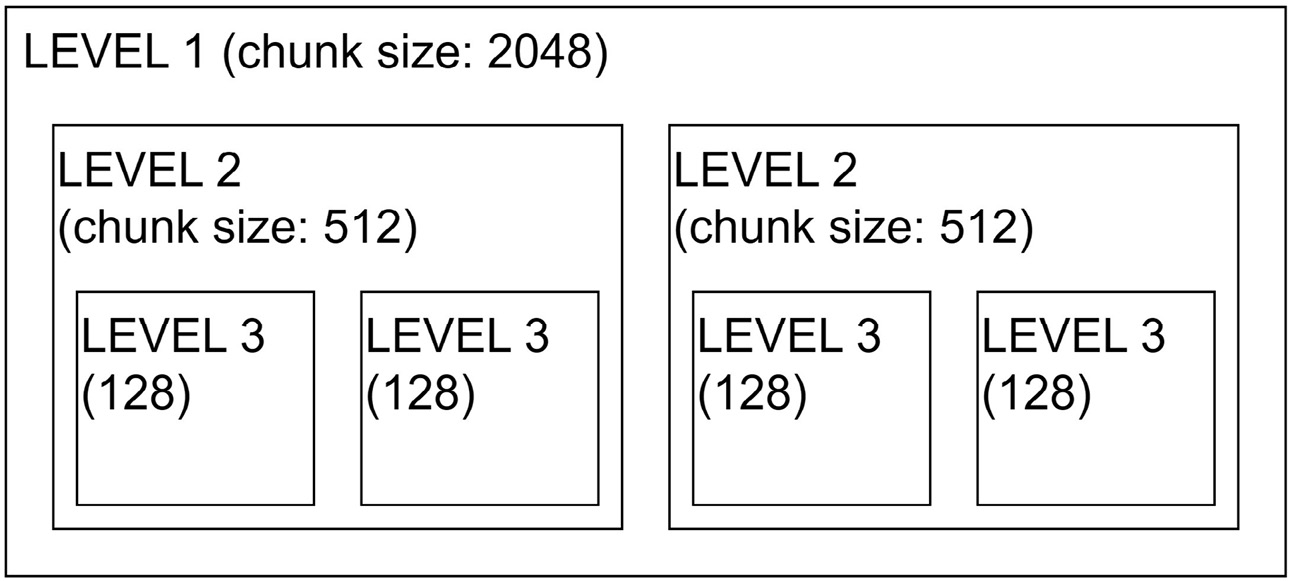

In [65]:
hierarchical_node_parser = HierarchicalNodeParser.from_defaults(chunk_sizes=[2048, 512, 128])

In [66]:
nodes = hierarchical_node_parser.get_nodes_from_documents(documents)

In [67]:
len(nodes)

243

In [68]:
nodes[0].to_dict()

{'id_': '98ee29f4-0eea-4f66-b3e4-31b35f58fc37',
 'embedding': None,
 'metadata': {'file_path': 'data/paul_graham_essay.txt',
  'file_name': 'paul_graham_essay.txt',
  'file_type': 'text/plain',
  'file_size': 75042,
  'creation_date': '2024-05-29',
  'last_modified_date': '2024-05-29'},
 'excluded_embed_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'excluded_llm_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'relationships': {<NodeRelationship.SOURCE: '1'>: {'node_id': '81e12d40-2a75-4318-b0e2-d8722223b610',
   'node_type': <ObjectType.DOCUMENT: '4'>,
   'metadata': {'file_path': 'data/paul_graham_essay.txt',
    'file_name': 'paul_graham_essay.txt',
    'file_type': 'text/plain',
    'file_size': 75042,
    'creation_date': '2024-05-29',
    'last_modified_date': '2024-05-29'},
   'hash': 'da49f0e8ddddf923b29014c8d3eaa2eab

# Node parsers vs text splitters

To simplify, a node parser is a more sophisticated mechanism than a simple splitter. While both serve the same basic function and operate at different levels of complexity, they differ in their implementations.

- Text splitters such as SentenceSplitter can divide long flat texts into nodes, based on certain rules or limitations, such as chunk_size or chunk_overlap. The nodes could represent lines, paragraphs, or sentences, and may also include additional metadata or links to the original document.

- Node parsers are more sophisticated and can involve additional data processing logic. Beyond simply dividing text into nodes, they can perform extra tasks, such as analyzing the structure of HTML or JSON files and producing nodes enriched with contextual information.